In [1]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
sns.set_style('ticks')
font = {
    'font.family':'Times New Roman',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 2,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

# Parse and plot spot instance prices

In [2]:
import pandas as pd
from datetime import datetime
import os

import pylab
def per_province_cases(df, provinces=None, cumulative=True):
    if provinces is None:
        provinces = sorted(list(set(list(df["denominazione_regione"]))))
    
    fig, ax = plt.subplots(figsize=(10,4))
    
    for province in provinces:
        per_province_df = df[df["denominazione_regione"] == province][
            ["data", "totale_casi"]
        ]
        grouped_per_province_df = per_province_df.groupby(
            "data").sum().reset_index()
        
        dates = list(grouped_per_province_df["data"])
        dates = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in dates]
        first_date = dates[0]
        total_cases = list(grouped_per_province_df["totale_casi"])
        if not cumulative:
            total_cases = [0] + total_cases
            total_cases = [total_cases[i] - total_cases[i-1]
                           for i in range(1, len(total_cases))]
        
        ax.plot([(x - first_date).total_seconds() / (3600 * 24) for x in dates],
                total_cases, label=province)

    if cumulative:
        ax.set_ylabel("Number of\ntotal cases")
    else:
        ax.set_ylabel("Number of\nnew cases")
    ax.set_xlabel("Time (days)")
    ax.set_ylim([0, None])
    ax.set_xlim([0, None])
    sns.despine()

    leg = plt.figlegend(ncol=4, frameon=False, labelspacing=0.25,
                        columnspacing=0.8, handlelength=1.5,
                        loc='upper center')

    bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
    y_offset = 0.05
    bb.y0 += y_offset
    bb.y1 += y_offset
    leg.set_bbox_to_anchor(bb, transform=ax.transAxes)

    plt.show()

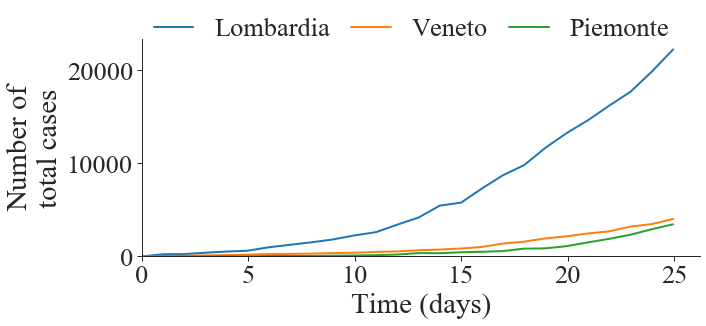

In [3]:
df = pd.read_csv("../data/italy_provinces.csv")
per_province_cases(df, provinces=["Lombardia", "Veneto", "Piemonte"])

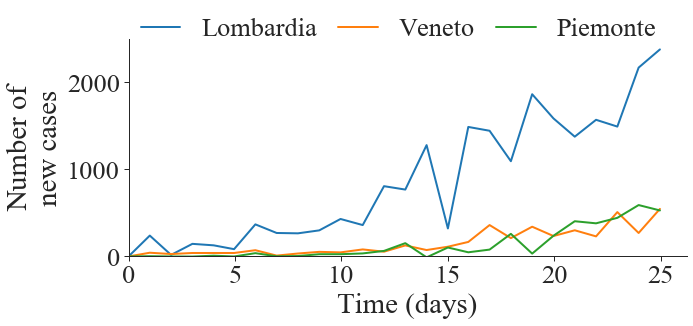

In [4]:
per_province_cases(df, provinces=["Lombardia", "Veneto", "Piemonte"],
                   cumulative=False)